<p>
    <b>Name:</b> Christopher Oscar Cieslak<br>
    <b>Matrikelnr.:</b> 550483 <br>
    <b>Kurs:</b> Angewandte Programmierung FOM Köln
</p>

<img src="img\amazon-logo.png" width=600 height=50  align="center" />
    


# Clustering von Amazon Bewertungen

<h3>Datenquelle</h3>
<p><b>DATASET:</b> <a href="http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Luxury_Beauty.json.gz">Link zu den Daten</a> (http://deepyeti.ucsd.edu/jianmo/amazon/)</p>

# Inhaltverzeichnis

[Datenquelle](#Datenquelle)
1. [Geschäftsverständnis](#1.-GESCHAFTSVERSTÄNDNISS)
2. [Datenverständnis & Datenvorbereitung](#2.-DATENVERSTÄNDNIS-&-DATENVORBEREITUNG)
3. [Modellierung und Evaluierung](#3.-MODELLIERUNG-&-EVALUIERUNG)
4. [Visualisierung](#4.-VISUALISIERUNG)
5. [Quellenverzeichnis](#Quellenverzeichnis)

<h1>1. GESCHAFTSVERSTÄNDNISS</h1>
<h3>1.1 Forschungsfrage</h3>
<h3><i>In wie viele Gruppen lassen sich Amazon Bewertungen <b>ohne die Sternebewertung</b> aufteilen und welche Erkenntnisse lassen sich daraus gewinnen?</i></h3>
<p>Das Ziel ist es vorhandene und neue Eigenschaften zu finden, mithilfe dieser eine <b>Einteilung</b> durchgeführt werden kann.</p>

<h3>1.2 Über den Datensatz</h3>
<li>Der Datensatz hat <b>12 Spalten</b> und <b>574 628 Observationen</b></li>
<li>Dabei steht jede Zeile für eine Rezension zu einem bestimmten Produkt. Manche Rezensionen kommen auch doppelt vor.</li>


<h3>1.3 Ziele</h3>
<li>Importieren einer JSON-Datei</li>
<li>Fehlende Daten behandeln und Dateninkosistenzen lösen</li>
<li>Datentypen überprüfen und sinvolle Änderungen vornehmen</li>
<li>Zusätzlich benötigte Spalten erstellen und befüllen</li>
<li>Daten aufteilen und standardisieren</li>
<li>Clusteringverfahren angewendet</li>
<li>Clusteringergebnisse validiert</li>


<h1>2. DATENVERSTÄNDNIS & DATENVORBEREITUNG</h1>

<h3>2.1 Daten Import</h3>

In [1]:
# Importe
import pandas as pd
import numpy as np
import json
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
import re

#Design Optimierungen
sns.set_style('darkgrid') #setzt den Stype für die Diagramme
pd.set_option('max_columns',100) 

In [2]:
# JSON-Datei wird eingelesen (enthält viele JSON-Objekte)
with open('data\Luxury_Beauty.json') as f:
    data = [json.loads(line) for line in f]    
df = pd.DataFrame.from_records(data)

In [3]:
df.head()

overall vote  verified   reviewTime      reviewerID        asin  \
0      2.0    3      True  06 15, 2010  A1Q6MUU0B2ZDQG  B00004U9V2   
1      5.0   14      True   01 7, 2010  A3HO2SQDCZIE9S  B00004U9V2   
2      5.0  NaN      True  04 18, 2018  A2EM03F99X3RJZ  B00004U9V2   
3      5.0  NaN      True  04 18, 2018   A3Z74TDRGD0HU  B00004U9V2   
4      5.0  NaN      True  04 17, 2018  A2UXFNW9RTL4VM  B00004U9V2   

    reviewerName                                         reviewText  \
0      D. Poston  I bought two of these 8.5 fl oz hand cream, an...   
1        chandra  Believe me, over the years I have tried many, ...   
2      Maureen G                                  Great hand lotion   
3        Terry K  This is the best for the severely dry skin on ...   
4  Patricia Wood  The best non- oily hand cream ever. It heals o...   

                         summary  unixReviewTime                  style image  
0          dispensers don't work      1276560000                    NaN   NaN  
1          Best hand cream ever.      1262822400                    NaN   NaN  
2                     Five Stars      1524009600  {'Size:': ' 3.5 oz.'}   NaN  
3                     Five Stars      1524009600  {'Size:': ' 3.5 oz.'}   NaN  
4  I always have a backup ready.      1523923200  {'Size:': ' 3.5 oz.'}   NaN

Bedeutung der einzelnen Spalten:
<li>overall - Anzahl der Sterne</li>
<li>vote - Anzahl der Leute die die Bewertung als hilfreich fanden</li>
<li>verified - Kaufverifizierung</li>
<li>reviewTime  - Zeitstempel wann die Bewertung hochgeladen worden ist</li>
<li>reviewerID - ID des Bewertenden</li>
<li>asin - ID des Produktes (Amazon-Standard-Identifikationsnummer)</li>
<li>reviewerName - Name des Bewertenden</li>
<li>reviewText - der Bewertungstext</li>
<li>summary - Zusammenfassung/Titel der Bewertung</li>
<li>unixReviewTime - Zeitstempel wann die Bewertung hochgeladen worden ist (unix time)</li>
<li>style - bestimmte Produktmetadaten</li>
<li>image - Bild das an die Bewertung angehangen wurde</li>

<h3>2.2 Fehlende Daten</h3>

In [4]:
# Eine Tabelle mit fehlenden Daten wird erstellt
missing_values=df.isnull().sum() # Fehlende Werte

percent_missing = df.isnull().sum()/df.shape[0]*100 # Fehlende Werte in %

value = {
    'fehlende_werte ':missing_values,
    'fehlende_werte %':percent_missing , 
     'Datentyp' : df.dtypes
}
frame=pd.DataFrame(value)
frame

fehlende_werte   fehlende_werte % Datentyp
overall                       0          0.000000  float64
vote                     470939         81.955456   object
verified                      0          0.000000     bool
reviewTime                    0          0.000000   object
reviewerID                    0          0.000000   object
asin                          0          0.000000   object
reviewerName                 31          0.005395   object
reviewText                  400          0.069610   object
summary                     183          0.031847   object
unixReviewTime                0          0.000000    int64
style                    323615         56.317304   object
image                    567210         98.709078   object

<li><b><i>unixReviewTime</i> (Unixzeit) und <i>style</i> (Gewicht der Bestellung) werden gelöscht </b>, weil es schon eine Spalte reviewTime gibt und Style wird nicht benötigt, weil es in den meisten Fällen nicht befüllt und für die weitere Analyse nicht relevant ist</li>

In [5]:
#Die Spalte unixReviewTime wird nicht benötigt, da schon die Spalte reviewTime existiert
if 'unixReviewTime' in df.columns:
    del df['unixReviewTime']
    
#Die Spalte Style wird für die Analyse nicht weiter benötigt und deshalb gelöscht
if 'style' in df.columns:
    del df['style'] 

<h3>2.3 Datenvorverarbeitung</h3>

Nachdem die Datenvorverarbeitung abgeschlossen ist soll ein einheitlicher, bereinigter Datensatz zur Verfügung stehen mit dem weitergearbeitet werden kann.
Dazu werden zunächst die Datentypen der einzelnen Spalten überprüft.

In [6]:
# Informationen über Spalten und Datentypen ausgeben
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 10 columns):
overall         574628 non-null float64
vote            103689 non-null object
verified        574628 non-null bool
reviewTime      574628 non-null object
reviewerID      574628 non-null object
asin            574628 non-null object
reviewerName    574597 non-null object
reviewText      574228 non-null object
summary         574445 non-null object
image           7418 non-null object
dtypes: bool(1), float64(1), object(8)
memory usage: 40.0+ MB


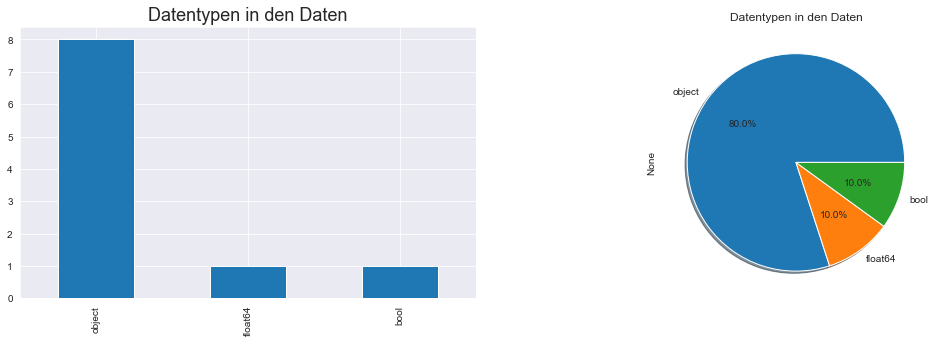

In [7]:
#Zeichen und Achesenbereich wird erstellt
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

df.dtypes.value_counts().plot.pie(explode=None,autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('Datentypen in den Daten');
axarr[0].set_title("Datentypen in den Daten", fontsize=18)
plt.show;

Die meisten der Spaltentypen wurden richtig erkannt, doch bei einigen muss noch nachjustiert werden. Zudem müssen bei manachen Spalten Werte durch 1 und 0 ersetzt werden, damit eine spätere Analyse möglich wird.

In [8]:
# manche Zeilen liegen mehrfach vor --> Duplikate werden entfernt und letzte Zeile wird behalten
df.drop_duplicates(subset=['overall','reviewerID','reviewerName','asin'] ,keep="last",inplace = True)

#Hier werden in der Spalte verified die Werte die False sind auf 0 und die Werte die True sind auf 1 geändert
df['verified'].replace({False : 0, True : 1},inplace = True)
#Die Objektdaten werden nicht geändert, es sei denn, der Parameter inplace ist auf True gesetzt
#Ansonsten wird standardmäßig ein neuer DataFrame zurückgegeben

#Die NaN Werte in Spalte summary und vote werden auf 0 gesetzt
df['vote'].fillna(0, inplace=True)
#df['reviewText'].fillna(0, inplace=True)
df['summary'].fillna(0, inplace=True)

#Wenn reviewText Nan enthält wird die Zeile gelöscht
df.dropna(subset=['reviewText'], inplace=True)

#Zudem wird bei vote das Komma zu einem Punkt gemacht und der Datentyp auf float gesetzt
df["vote"] = [str(x).replace(",", ".") for x in df["vote"]]
df[['vote']] = df[['vote']].astype(float)

#Die NaN Werte in Spalte reviewerName werden mit der ID befüllt
df['reviewerName'].fillna(df['reviewerID'], inplace=True)

#in der Spalte reviewTime wird wird der Datentyp der Spalte auf Datetime gesetzt
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

#Wenn in der Spalte image ein Link zu dem Bild da ist gibt es eine 1 sonst den Wert Null, außerdem wird der Datentyp der Spalte auf int gesetzt
df.loc[df['image'].isnull(),'image'] = int(0)
df.loc[df['image'] != 0,'image'] = int(1)   
df[['image']] = df[['image']].astype(int)

#Spalte overall enthält nur int Werte, deshalb wird der Datentyp der Spalte auf int gesetzt
df[['overall']] = df[['overall']].astype(int)

<p>Nun kan man sich die Daten mal anschauen. Die folgende Visualisierung zeigt die <b>Anzahl der Amazon Bewertungen nach Sternen</b> geordnet. </p>
 <p>Damit hat man eine Klassifizierung der Bewertungen nach Sternen. Doch die Forschungsfrage war, ob eine Einteilung ohne die Sterne erstellt werden kann.</p>

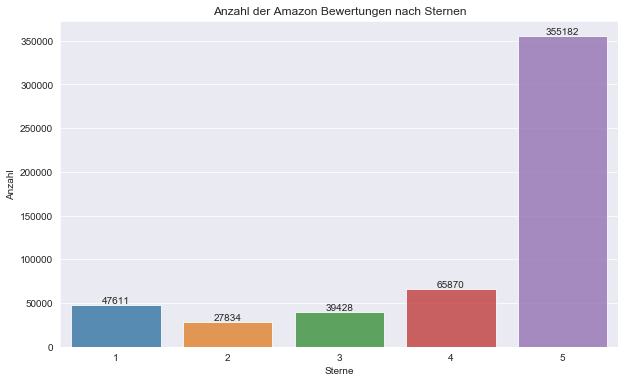

In [9]:
x=df['overall'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x = x.index, y = x.values, alpha = 0.8, palette = 'tab10' )
plt.title("Anzahl der Amazon Bewertungen nach Sternen")
plt.ylabel('Anzahl')
plt.xlabel('Sterne')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
plt.show();

<h3>2.4 Feature Engineering</h3>

In diesem Abschnitt werden durch Kombination und Transformation von vorhandenen Features neue Features generiert. Zunächst wäre es sehr hilfreich einen Wordcount für den <i>reviewerText</i> zu haben. Außerdem wäre es sinvoll mithilfe einer Sentimentanalyse Aussagen über die Subjektivität und Polarität eines Textes feststellen zu können.
Zu diesem Zweck wird die Python Bibliothek <i>TextBlob</i> verwendet [[1]](#texblob2020). Es ist eine einfache Bibliothek, die komplexe Analysen und Operationen an Textdaten unterstützt.
Folgende Parameter sind für diese Analyse interessant:
* Die <i>Polarität</i> liegt zwischen [-1,1], -1 definiert eine negative Stimmung und 1 definiert eine positive Stimmung. Negationswörter kehren die Polarität um. Dabei verfügt Texblob über semantische Beschriftungen, die bei der Feinanalyse hilfreich sind. Zum Beispiel Emoticons, Ausrufezeichen, Emojis usw.

* Die <i>Subjektivität</i> liegt zwischen [0,1]. Die Subjektivität quantifiziert die Menge an persönlicher Meinung und sachlichen Informationen, die im Text enthalten sind. Umso höher die Subjektivität, desto eher enthält der Text eine persönliche Meinung als sachliche Informationen [[2]](#sentiment2020)


In [10]:
# Neue Spalte count_reviewText wird erstellt mit der Anzahl der Wörter
df["count_reviewText"] = df["reviewText"].str.count(" ") + 1

Bevor mit der Sentimentanalyse angefangen wird, ist es wichtig, die Textdaten vorzuverarbeiten.
Alles in Kleinbuchstaben umwandeln, hilft bei der Normalisierung, was ein wichtiger Schritt ist, um die Wörter einheitlich zu halten [[3]](#lowersentiment).

In [11]:
df['polarity'] = df['reviewText'].apply(lambda text: TextBlob(str(text).lower()).sentiment.polarity) #Spalte polarity wird hinzugefügt und befüllt
df['subjectivity'] = df['reviewText'].apply(lambda text: TextBlob(str(text).lower()).sentiment.subjectivity) #Spalte subjectivity wird hinzugefügt und befüllt

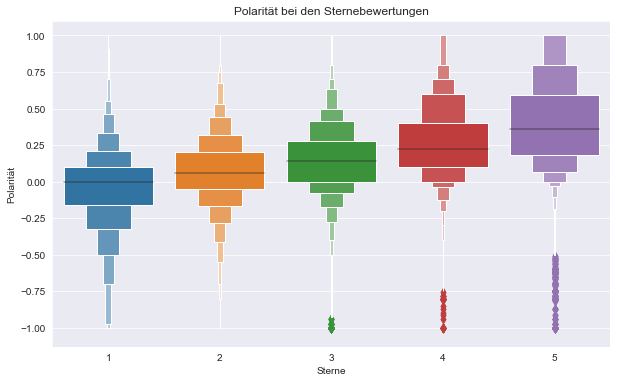

In [12]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='overall', y='polarity', data=df)
plt.title('Polarität bei den Sternebewertungen')
plt.xlabel('Sterne')
plt.ylabel('Polarität')
plt.show();

Bei der Polarität sieht man deutlich einige Außreißer. Diese sollen im folgenden kurz beleuchtet werden.

In [13]:
df[df['polarity'] <-0.5].head(5)

overall  vote  verified reviewTime      reviewerID        asin  \
227        5   0.0         1 2016-12-14  A2RR32TT5YD8J3  B00004U9V2   
378        1   0.0         1 2015-12-09  A2Q7EC3PTV3M49  B00004U9V2   
428        2   0.0         1 2015-02-19  A31OW0TTG5SHNJ  B00004U9V2   
452        5   0.0         1 2014-12-22  A2JMFHPDJ1Q9I4  B00004U9V2   
522        3   0.0         1 2014-01-07  A142UAXE3LS2C2  B00004U9V2   

        reviewerName                                         reviewText  \
227  Colette Jaccard  Crabtree & Evelyn products don't exist in Euro...   
378                E  Disappointed that at the price I paid the prod...   
428           Debbie                   horrible smell for me, at least.   
452      regina cohn  I have been using Evelyn & Crabtree products f...   
522    Marcia Fraley  container was dented upon arrival....have not ...   

                                               summary  image  \
227  Crabtree & Evelyn products don't exist in Euro...      0   
378                                             Dented      0   
428                                          Two Stars      0   
452                   I haven't been disappointed yet.      0   
522                              container was damaged      0   

     count_reviewText  polarity  subjectivity  
227                27    -0.625          0.90  
378                11    -0.750          0.75  
428                 6    -0.650          0.70  
452                15    -0.750          0.75  
522                22    -0.700          0.20

In [15]:
df['reviewText'].sort_index().loc[227:].values[0]

"Crabtree & Evelyn products don't exist in Europe anymore so I purchase them for my aunt who lives in Paris.  Can't go wrong with these products!"

Aus diesem Beispiel geht hervor, dass die Polarität nicht immer mit der assoziierten Bewertung übereinstimmt. Aber warum ist dies so?
Nach einer Recherche im Internet hat es sich herausgestellt, dass TextBlob Wörter und Phrasen findet, denen er Polarität und Subjektivität zuordnen kann und sie bei längeren Texten zusammenfasst. In unserem Beispiel war der Text kurz jedoch hat diese Bewertung mehr Wörter und Phrasen enthalten die negativ konnotiert waren.

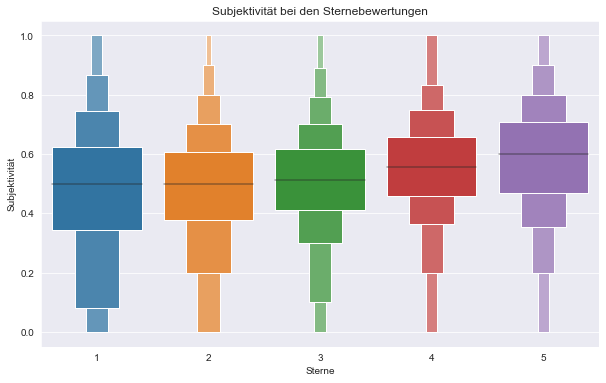

In [16]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='overall', y='subjectivity', data=df)
plt.title('Subjektivität bei den Sternebewertungen')
plt.xlabel('Sterne')
plt.ylabel('Subjektivität')
plt.show();

Nun wird ein Subset von Daten gebildet indem sich die für die Analyse benötigten Daten befinden.

In [17]:
dt_f = df[['count_reviewText', 'polarity','subjectivity','overall','reviewText']].copy()

In [18]:
#Features werden getrennt und die Daten standatisiert
#Wichtig-->Ausreißer sind immernoch sichtbar
from sklearn.preprocessing import StandardScaler
dataset_array = dt_f.iloc[:, [0,1,2]].values #Feature-Skalierung
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset_array)
scaled_features

array([[ 0.06604942, -0.11377125,  0.24258497],
       [ 1.01030971, -0.14671005, -0.54501621],
       [-0.65502207,  1.56215513,  0.89186001],
       ...,
       [-0.62068533,  1.87836765,  1.45481525],
       [-0.53484349,  1.24594261,  0.21631373],
       [-0.67219044,  1.56215513,  0.89186001]])

<h1>3. MODELLIERUNG & EVALUIERUNG</h1>

In [19]:
from sklearn.cluster import KMeans

<p>Es ist sehr schwer ein Clusteringergebnis objektiv zu bewerten, da ein Clusteringalgorithmus in eigener Verantwortung Cluster finden soll.<br>
Da diese Gruppeneinteilung aber nicht bekannt ist, ist es schwer zu sagen, ob ein Cluster gut gewählt ist oder nicht.<br>
Dennoch gibt es einige Methoden mit denen man bessere Clusteringergebnisse erzielen kann. Hier wurde die Elbow-Methode verwendet:</p>

* Das Elbow-Kriterium eignet sich, um bei einem k-means Clustering die optimale Anzahl von Clustern zu bestimmen. Dabei trägt man in einem Diagramm auf der x-Achse die Anzahl der Cluster auf und auf der y-Achse die Summe der quadrierten Abweichungen der einzelnen Punkte zum jeweiligen Clusterzentrum. Falls auf dem Diagramm ein Knick erkennbar sein sollte, ist dieser Punkt die optimale Anzahl an Clustern. Denn ab diesem Punkt sinkt die Aussagekraft der einzelnen Cluster, da sich die Summe der quadrierten Abweichungen nur noch leicht verändert [[4]](#elbowkrit).


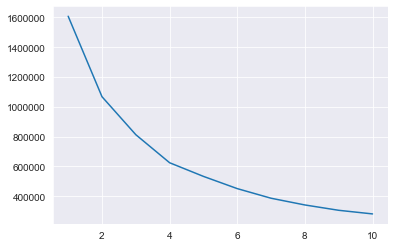

In [20]:
kmeans_kwargs = {
   "init": "random", #steuert die Initialisierungstechnik
   "n_init": 12, #setzt k für den Clustering-Schritt
   "max_iter": 300, #Legt die Anzahl der maximalen Iterationen für jede Initialisierung des k-means-Algorithmus fest
   "random_state": 42, #damit es vergleichbar ist
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_) # -> kleinste Summe der quadratischen Fehler (SSE)

plt.plot(range(1, 11), sse)
plt.show;

In [21]:
#KneeLocator wird verwendet um den Knick in der Kurve zu finden
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("Die beste Anzahl von Clustern für die vorliegenden Daten ist: "+ str(kl.elbow))

Die beste Anzahl von Clustern für die vorliegenden Daten ist: 4


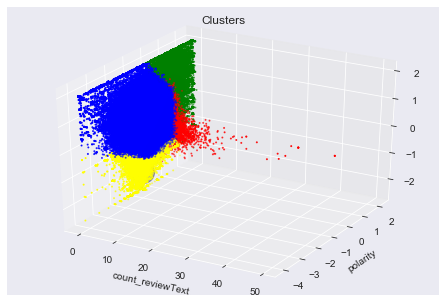

In [22]:
from mpl_toolkits.mplot3d import Axes3D

X=scaled_features
kmeans = KMeans(n_clusters=kl.elbow, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)

#Clusterspalte wird an Dataframe angehangen
dt_f.loc[:,'clus_km'] = y_kmeans

#3D Figur mit den 4 Clustern wird erstellt
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], s=500, c='black', label = 'Centroids')
ax.scatter(X[y_kmeans==0, 0],X[y_kmeans==0, 1],X[y_kmeans==0, 2],color='blue',s=1)
ax.scatter(X[y_kmeans==1, 0],X[y_kmeans==1, 1],X[y_kmeans==1, 2],color='yellow',s=1)
ax.scatter(X[y_kmeans==2, 0],X[y_kmeans==2, 1],X[y_kmeans==2, 2],color='green',s =1)
ax.scatter(X[y_kmeans==3, 0],X[y_kmeans==3, 1],X[y_kmeans==3, 2],color='red',s =1)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('count_reviewText')
plt.ylabel('polarity')
plt.show();

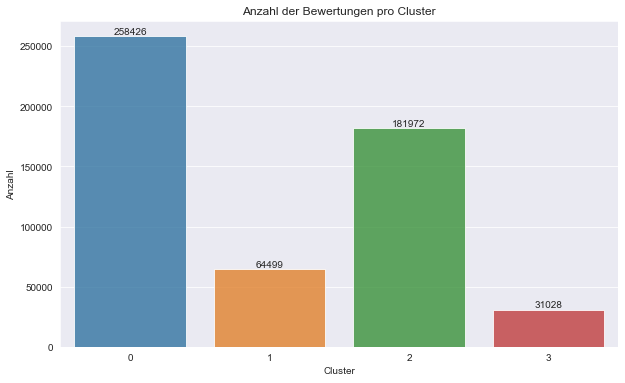

In [23]:
x=dt_f['clus_km'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x = x.index, y = x.values, alpha = 0.8, palette = 'tab10' )
plt.title("Anzahl der Bewertungen pro Cluster")
plt.ylabel('Anzahl')
plt.xlabel('Cluster')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
plt.show();

In [24]:
dt_f.groupby(['clus_km']).mean()

count_reviewText  polarity  subjectivity   overall
clus_km                                                    
0               45.582391  0.150119      0.550648  3.988175
1               16.568055  0.038993      0.131458  3.669545
2               13.971551  0.648893      0.709618  4.767415
3              214.777233  0.147992      0.512534  4.063652

In [25]:
dt_f[dt_f['clus_km'] ==2]

count_reviewText  polarity  subjectivity  overall  \
2                      3  0.800000      0.750000        5   
4                     10  1.000000      0.300000        5   
6                      5  0.366667      0.675000        5   
7                      5  1.000000      0.300000        5   
8                     16  0.652778      0.644444        5   
...                  ...       ...           ...      ...   
574623                 8  0.800000      0.750000        5   
574624                25  0.781667      0.650000        5   
574625                 5  0.900000      0.875000        5   
574626                10  0.700000      0.600000        1   
574627                 2  0.800000      0.750000        5   

                                               reviewText  clus_km  
2                                       Great hand lotion        2  
4       The best non- oily hand cream ever. It heals o...        2  
6                              Works great for dry hands.        2  
7                               The best hand cream ever.        2  
8       LOVE THIS SCENT!!  But Crabtree and Evelyn mak...        2  
...                                                   ...      ...  
574623          Great color and I prefer shellac over gel        2  
574624  Best shellac I have ever used.  It doesn't tak...        2  
574625                 Great polish and beautiful color!!        2  
574626  The perfume is good, but the spray head broke ...        2  
574627                                   Great fragrance.        2  

[181972 rows x 6 columns]

In [30]:
dt_f['reviewText'].sort_index().loc[8:].values[0]

'LOVE THIS SCENT!!  But Crabtree and Evelyn make so many.  Washes off easily too!!'

<h1>4. VISUALISIERUNG</h1>

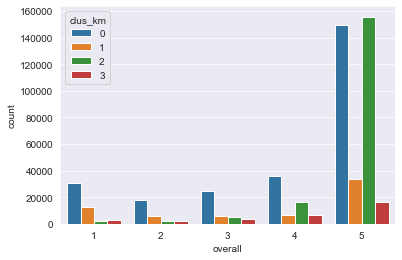

In [27]:
ax = sns.countplot(x="overall", hue="clus_km", palette = 'tab10',data=dt_f)
plt.show();


In [28]:
test_dataframe_2 = df[['count_reviewText', 'polarity','subjectivity','overall']]

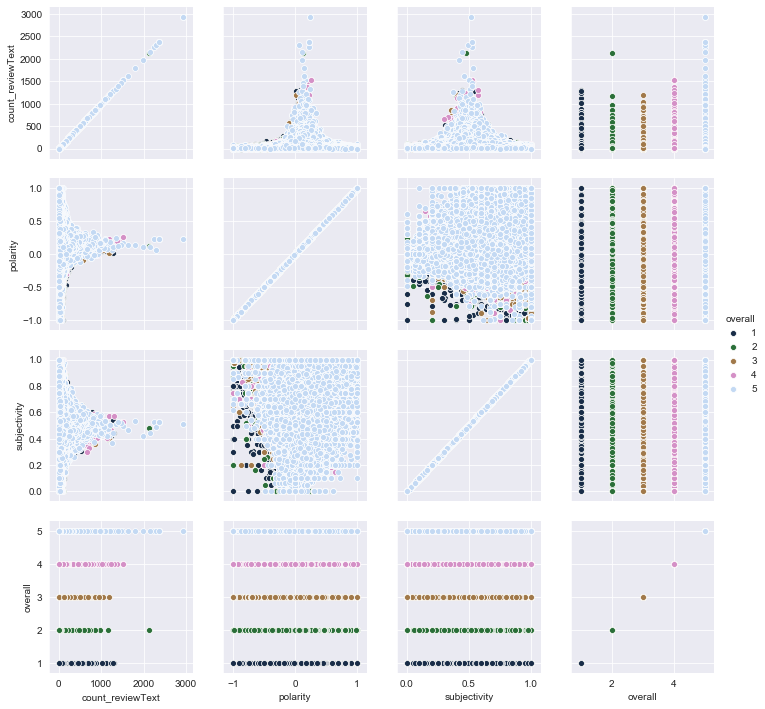

In [29]:
sns.pairplot(test_dataframe_2, hue = 'overall', palette = 'cubehelix', diag_kind = None)
plt.show();

<h1>Quellenverzeichnis</h1>

[1]<a class="anchor" id="texblob2020"></a> Steven Loria (2020). TextBlob. Aufgerufen am 16.05.2020 von https://textblob.readthedocs.io/en/dev/

[2]<a class="anchor" id="sentiment2020"></a> Parthvi Shah (2020). Sentiment Analysis using TextBlob. Aufgerufen am 16.05.2020 von https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

[3]<a class="anchor" id="lowersentiment"></a> Aakash Chugh (2018). Sentiment Analysis using Python. Aufgerufen am 16.05.2020 von https://data-science-blog.com/en/blog/2018/11/04/sentiment-analysis-using-python/

[4]<a class="anchor" id="elbowkrit"></a> rocketloop (2019). Machine Learning Clustering in Python. Aufgerufen am 16.05.2020 von https://rocketloop.de/de/blog/machine-learning-clustering-in-python/